<div style="font-family: Arial, sans-serif; max-width:750px; line-height:1.6;">
  <h2 style="margin-bottom:0.3rem;">Project Overview</h2>
  <p>
    In this project, we will work with a very famous dataset called <strong>MNIST</strong>.
    This dataset has <strong>70,000 images</strong> of handwritten digits (numbers from 0 to 9).
    Each image is small  only <strong>28 × 28 pixels</strong> and in black and white.
  </p>

  <p>
    We will build an <strong>Artificial Neural Network (ANN)</strong> using Keras’ Sequential API.
    The model will learn to look at each image and guess which number it shows.
  </p>

  <ul>
    <li><strong>Training:</strong> We will teach the model using <strong>60,000 images</strong>.</li>
    <li><strong>Testing:</strong> We will check how good the model is using <strong>10,000 new images</strong> it has never seen before.</li>
  </ul>

  <p>
    Think of it like teaching a child to read numbers first we show many examples (training),
    then we give a quiz with new numbers (testing) to see how well they learned.
  </p>
</div>


In [1]:
# Importing important libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

<h2> We are splitting our data set into train and test

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [60]:
X_test.shape

(10000, 28, 28)

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

<h2> Now each image is of 28 by 28. we can understand by imagining a image divided into 28 rows and 28 col

In [5]:
X_train[0].shape

(28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

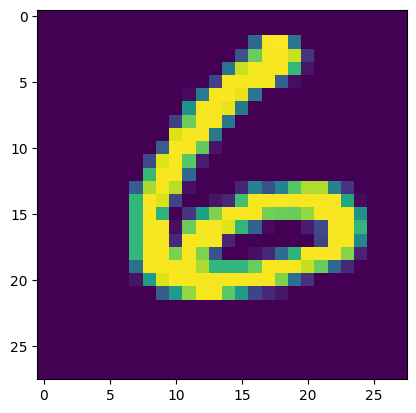

In [61]:
# We are looking at one of random pic just to see how does our data set look like
import matplotlib.pyplot as plt
plt.imshow(X_train[21331])

In [14]:
X_train[0] # as the data is a numpy array of 28 by 28 and we have values upto 0-255  so we will rescale it

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

<h2> So in order to rescale it we will divide each value by 255 because as max val = 255 and 255/255 = 1 = max value<br>Similarly when min val = 0 is divided by 255 => 0/255 = 0  Hence our data will be btween 0-1 and now is rescalled

In [16]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

Here in the above code we divided it by 255 rather then rescalling it because pixels cannot be negative so in order to avoid that we have done it so far

<!-- Copy-paste this whole block into an HTML cell in your notebook -->
<div style="font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial; max-width:800px; line-height:1.5;">
  <h2 style="margin-bottom:0.1rem;">Model Summary Explanation</h2>
  <p style="color:#444;margin-top:0.2rem;">
    This model is a simple fully-connected (dense) neural network for classifying 28×28 images (e.g., MNIST).
    Below we explain each layer, show how parameter counts are computed, and give the total trainable parameters.
  </p>

  <h3 style="margin-bottom:0.2rem;">Architecture (layers)</h3>
  <ol>
    <li><strong>Flatten</strong> — input <code>(28, 28)</code> → flattened to <code>(784,)</code>.
      <br><small>No trainable parameters; it only reshapes the input.</small>
    </li>
    <li><strong>Dense</strong> — 128 units, activation = ReLU.
      <br><small>Parameters = <code>784 × 128 + 128</code> (weights + biases).</small>
    </li>
    <li><strong>Dense</strong> — 128 units, activation = ReLU.
      <br><small>Parameters = <code>128 × 128 + 128</code>.</small>
    </li>
    <li><strong>Dense (output)</strong> — 10 units, activation = softmax.
      <br><small>Parameters = <code>128 × 10 + 10</code> (one bias per output).</small>
    </li>
  </ol>

  <h3 style="margin-top:0.4rem;">Parameter calculations</h3>
  <table style="width:100%; border-collapse:collapse;">
    <thead>
      <tr style="text-align:left; border-bottom:2px solid #eee;">
        <th style="padding:6px 4px;">Layer</th>
        <th style="padding:6px 4px;">Shape / Formula</th>
        <th style="padding:6px 4px;">Parameters</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding:6px 4px;">Flatten</td>
        <td style="padding:6px 4px;">(28, 28) → (784,)</td>
        <td style="padding:6px 4px;">0</td>
      </tr>
      <tr style="background:#fbfbfb;">
        <td style="padding:6px 4px;">Dense (128)</td>
        <td style="padding:6px 4px;"><code>784 × 128 + 128</code></td>
        <td style="padding:6px 4px;"><strong>100,480</strong></td>
      </tr>
      <tr>
        <td style="padding:6px 4px;">Dense (128)</td>
        <td style="padding:6px 4px;"><code>128 × 128 + 128</code></td>
        <td style="padding:6px 4px;"><strong>16,512</strong></td>
      </tr>
      <tr style="background:#fbfbfb;">
        <td style="padding:6px 4px;">Dense (10)</td>
        <td style="padding:6px 4px;"><code>128 × 10 + 10</code></td>
        <td style="padding:6px 4px;"><strong>1,290</strong></td>
      </tr>
      <tr style="border-top:2px solid #eee;">
        <td colspan="2" style="padding:8px 4px; font-weight:600;">Total trainable parameters</td>
        <td style="padding:8px 4px; font-weight:700; color:#0b6;">118,282</td>
      </tr>
    </tbody>
  </table>

  <h3 style="margin-top:0.6rem;">Short explanation — what these numbers mean</h3>
  <ul>
    <li><strong>Weights</strong> connect inputs → neurons. Each connection has a weight (e.g., 784 inputs × 128 neurons).</li>
    <li><strong>Biases</strong> add an extra trainable value per neuron (e.g., +128 biases for 128 neurons).</li>
    <li>The model will learn <strong>118,282</strong> scalar values from the data (these are updated during training).</li>
  </ul>

  <h3 style="margin-top:0.4rem;">Notes & suggestions</h3>
  <ul>
    <li>118k parameters is small — this model is lightweight and trains quickly on MNIST-like data.</li>
    <li>If you need higher accuracy, try adding dropout, batch normalization, or switching to a small convolutional network (CNN) which usually works much better for images.</li>
    <li>To inspect the layer output shapes and params in code, run <code>model.summary()</code> in your notebook as we have done it in the cell after the cell.</li>
  </ul>
</div>


In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

<div style="font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Arial; max-width:750px; line-height:1.5;">
  <h3 style="margin-bottom:0.3rem;">Compiling the Model</h3>
  <p>
    The <code>model.compile()</code> step configures the model for training by specifying:
  </p>
  <ul>
    <li><strong>Optimizer:</strong> <code>'adam'</code> — An adaptive learning rate optimization algorithm that combines the benefits of AdaGrad and RMSProp. It automatically adjusts the learning rate for each parameter, making training faster and more stable.</li>
    <li><strong>Loss function:</strong> <code>'sparse_categorical_crossentropy'</code> — Used for multi-class classification problems when target labels are integers (e.g., <code>0, 1, 2, ...</code>) instead of one-hot encoded vectors.</li>
  </ul>
  <p>
    At this stage, we do not specify metrics (like accuracy), but they can be added as:
    <br>
    <code>metrics=['accuracy']</code> to track performance during training and validation.
  </p>
</div>


In [62]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
)


<div style="font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Arial; max-width:750px; line-height:1.5;">
  <h3 style="margin-bottom:0.3rem;">Training the Model</h3>
  <p>
    The <code>model.fit()</code> method starts the training process, where the model learns patterns from the training data.
    In this case:
  </p>
  <ul>
    <li><strong><code>X_train</code>:</strong> Input features — the images (28×28 pixel arrays).</li>
    <li><strong><code>y_train</code>:</strong> Target labels — the correct digit for each image.</li>
    <li><strong><code>epochs=10</code>:</strong> The model will go through the entire training set <strong>10 times</strong> to adjust its weights.</li>
    <li><strong><code>validation_split=0.2</code>:</strong> 20% of the training data will be set aside for validation during training.
      <br>This helps us monitor the model’s performance on unseen data and detect overfitting.</li>
  </ul>
  <p>
    The output of <code>model.fit()</code> is stored in <code>history</code>, which contains training and validation loss/metrics for each epoch.
    These can be visualized later for performance analysis.
  </p>
</div>


In [40]:
history = model.fit(X_train,y_train,epochs=10 , validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9509 - loss: 0.1662 - val_accuracy: 0.9540 - val_loss: 0.1619
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9560 - loss: 0.1479 - val_accuracy: 0.9565 - val_loss: 0.1555
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9578 - loss: 0.1417 - val_accuracy: 0.9582 - val_loss: 0.1486
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9603 - loss: 0.1302 - val_accuracy: 0.9609 - val_loss: 0.1397
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9644 - loss: 0.1163 - val_accuracy: 0.9609 - val_loss: 0.1331
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9679 - loss: 0.1082 - val_accuracy: 0.9630 - val_loss: 0.1274
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9719 - loss: 0.0982 - val_accuracy: 0.9598 - val_loss: 0.1356
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9715 - loss: 0.0949 - 

In [41]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
y_prid = y_prob.argmax(axis=1)

<div style="font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Arial; max-width:750px; line-height:1.5;">
  <h3 style="margin-bottom:0.3rem;">Evaluating Model Accuracy</h3>
  <p>
    The <code>accuracy_score()</code> function from <code>sklearn.metrics</code> calculates the proportion of correct predictions made by the model.
  </p>
  <ul>
    <li><strong><code>y_test</code>:</strong> The true labels from the test dataset (ground truth).</li>
    <li><strong><code>y_prid</code>:</strong> The predicted labels generated by the model.
      <br><em>(Note: This should be spelled <code>y_pred</code> to follow convention.)</em></li>
    <li>The function compares both arrays element-wise and computes:
      <br><code>accuracy = (number of correct predictions) / (total predictions)</code>
    </li>
  </ul>
  <p>
    The result is a decimal between 0 and 1, where <code>1.0</code> means perfect accuracy, and values closer to <code>0</code> indicate poorer performance.
  </p>
</div>


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prid)

0.9047

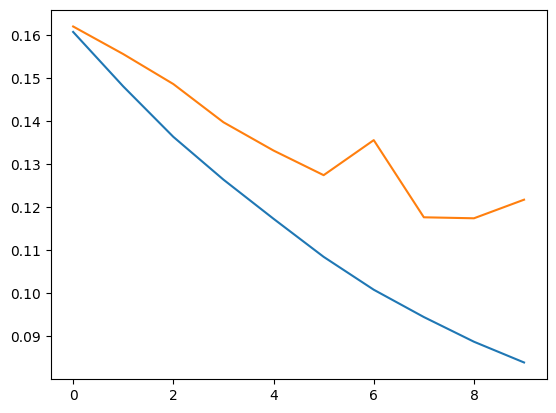

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

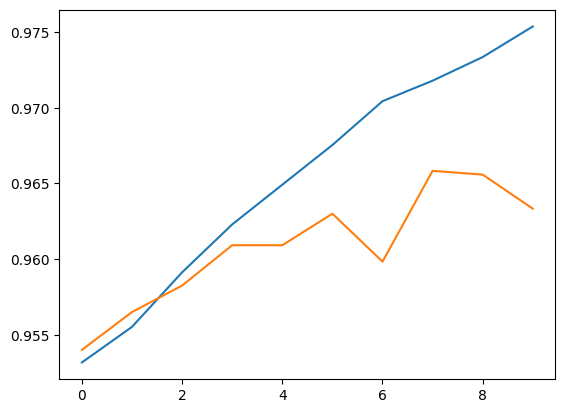

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

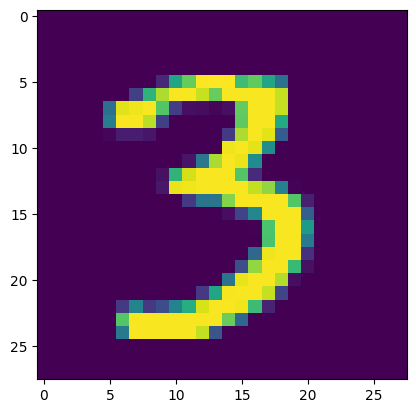

In [54]:
plt.imshow(X_train[10000])

In [59]:
a = model.predict(X_train[10000].reshape(1, 28, 28)).argmax(axis=1)
print("The number displayed in the pic is: " + str(a[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The number displayed in the pic is: 3
